In [7]:
from cobra.io import read_sbml_model
yeast_model = read_sbml_model('models/iMM904_progesterone.xml') # import model of progesterone producing yeast strain
yeast_model

Name,iMM904
Memory address,0x0218b40408b0
Number of metabolites,1234
Number of reactions,1585
Number of groups,0
Objective expression,1.0*BIOMASS_SC5_notrace - 1.0*BIOMASS_SC5_notrace_reverse_93090
Compartments,"cytosol, extracellular space, mitochondria, peroxisome/glyoxysome, endoplasmic reticulum, vacuole, golgi apparatus, nucleus"


In [8]:
yeast_model.medium # nutrients available in medium

{'EX_fe2_e': 999999.0,
 'EX_glc__D_e': 10.0,
 'EX_h2o_e': 999999.0,
 'EX_h_e': 999999.0,
 'EX_k_e': 999999.0,
 'EX_na1_e': 999999.0,
 'EX_so4_e': 999999.0,
 'EX_nh4_e': 999999.0,
 'EX_o2_e': 2.0,
 'EX_pi_e': 999999.0}

In [9]:
medium = yeast_model.medium
medium["EX_glc__D_e"] = 99999.0 # a lot of glucose is available
medium["EX_o2_e"] = 999999.0 # a lot of oxygen is available
yeast_model.medium = medium

yeast_model.medium

{'EX_fe2_e': 999999.0,
 'EX_glc__D_e': 99999.0,
 'EX_h2o_e': 999999.0,
 'EX_h_e': 999999.0,
 'EX_k_e': 999999.0,
 'EX_na1_e': 999999.0,
 'EX_so4_e': 999999.0,
 'EX_nh4_e': 999999.0,
 'EX_o2_e': 999999.0,
 'EX_pi_e': 999999.0}

In [12]:
from cobra.flux_analysis import production_envelope

prod_env = production_envelope(yeast_model, ["EX_glc__D_e", "EX_o2_e"])
prod_env

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glc__D_e,EX_o2_e
0,EX_glc__D_e,0.0,0.0,NaN,0.000000,2.779087e-13,NaN,-99999.000000,-599994.000000
1,EX_glc__D_e,0.0,0.0,NaN,861.418576,9.026350e-01,NaN,-99999.000000,-568415.368421
2,EX_glc__D_e,0.0,0.0,NaN,1722.837151,1.805270e+00,NaN,-99999.000000,-536836.736842
3,EX_glc__D_e,0.0,0.0,NaN,2584.255727,2.707905e+00,NaN,-99999.000000,-505258.105263
4,EX_glc__D_e,0.0,0.0,NaN,3445.674302,3.610540e+00,NaN,-99999.000000,-473679.473684
...,...,...,...,...,...,...,...,...,...
395,EX_glc__D_e,NaN,NaN,NaN,NaN,NaN,NaN,-0.058824,-126314.526316
396,EX_glc__D_e,NaN,NaN,NaN,NaN,NaN,NaN,-0.058824,-94735.894737
397,EX_glc__D_e,NaN,NaN,NaN,NaN,NaN,NaN,-0.058824,-63157.263158
398,EX_glc__D_e,NaN,NaN,NaN,NaN,NaN,NaN,-0.058824,-31578.631579


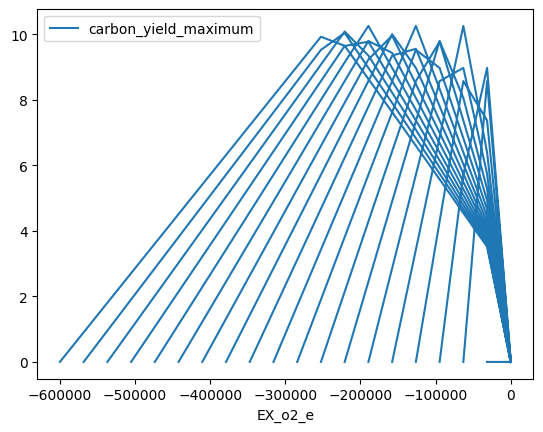

In [13]:
prod_env.plot(kind='line', x='EX_o2_e', y='carbon_yield_maximum');

In [ ]:
#data = phenotype_phase_plane.production_envelope(yeast_model, "EX_glc__D_e")
#print(data)
#data.plot_matplotlib();

#phenotypic_phase_plane(model, variables=[model.reactions.EX_glc__D_e], objective=model.metabolites.rHb_c) 

<AxesSubplot: xlabel='Glucose uptake [mmol/g DW/h]', ylabel='Biomass objective [1/h]'>

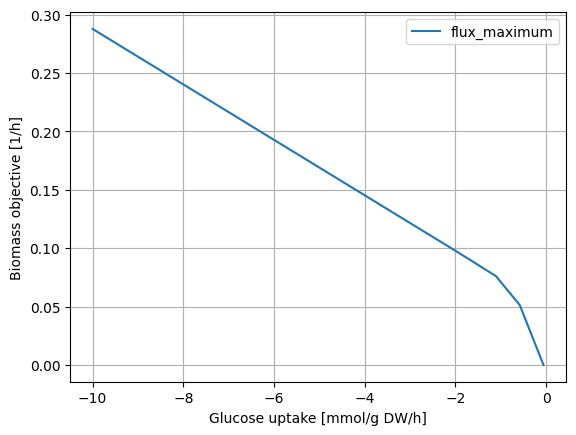

In [5]:
data.plot(x='EX_glc__D_e', y='flux_maximum', xlabel="Glucose uptake [mmol/g DW/h]", ylabel="Biomass objective [1/h]", grid = True)